In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

import pmdarima as pm


In [80]:
df = pd.read_csv("da_victimas_completa_marzo_2023.csv")
df.head()


,idCarpeta,Año_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,competencia,Año_hecho,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,alcaldia_hechos,municipio_hechos,colonia_datos,fgj_colonia_registro,latitud,longitud
0,8324429.0,2019,Enero,2019-01-04,FRAUDE,DELITO DE BAJO IMPACTO,Masculino,62.0,FISICA,OFENDIDO,FUERO COMUN,2018.0,Agosto,2018-08-29,12:00:00,12:19:00,ALVARO OBREGON,NaN,GUADALUPE INN,GUADALUPE INN,19.36125,-99.18314
1,8324430.0,2019,Enero,2019-01-04,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,Femenino,38.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2018.0,Diciembre,2018-12-15,15:00:00,12:20:00,AZCAPOTZALCO,NaN,VICTORIA DE LAS DEMOCRACIAS,VICTORIA DE LAS DEMOCRACIAS,19.47181,-99.16458
2,8324431.0,2019,Enero,2019-01-04,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2018.0,Diciembre,2018-12-22,15:30:00,12:23:00,COYOACAN,NaN,COPILCO EL BAJO,COPILCO UNIVERSIDAD ISSSTE,19.33797,-99.18611
3,8324435.0,2019,Enero,2019-01-04,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,35.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Enero,2019-01-04,06:00:00,12:27:00,IZTACALCO,NaN,PANTITLAN V,AGRÍCOLA PANTITLAN,19.40327,-99.05983
4,8324438.0,2019,Enero,2019-01-04,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,VICTIMA,FUERO COMUN,2019.0,Enero,2019-01-03,20:00:00,12:35:00,IZTAPALAPA,NaN,LAS AMERICAS (U HAB),PROGRESISTA,19.35480,-99.06324


In [84]:
df = df[df['Categoria'] == "DELITO DE BAJO IMPACTO"]
df = df[df['Año_hecho'] > 2018]
df = df[df['alcaldia_hechos'] == 'IZTAPALAPA']

In [85]:
df['Mes_hecho'].value_counts()

Mes_hecho
Marzo         12205
Febrero       11431
Enero         11328
Agosto         9794
Julio          9605
Octubre        9594
Mayo           9537
Septiembre     9309
Junio          9250
Noviembre      9131
Abril          8846
Diciembre      8241
Name: count, dtype: int64

In [86]:
df['Mes_num'] = df['Mes_hecho'].map({
    "Enero": "01",
    "Febrero": "02",
    "Marzo": "03",
    "Abril": "04",
    "Mayo": "05",
    "Junio": "06",
    "Julio": "07",
    "Agosto": "08",
    "Septiembre": "09",
    "Octubre": "10",
    "Noviembre": "11",
    "Diciembre": "12"
})

In [87]:
df['date_group'] = df['Año_hecho'].astype(int).astype(str) + "_" + df['Mes_num']
df

,idCarpeta,Año_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,competencia,Año_hecho,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,alcaldia_hechos,municipio_hechos,colonia_datos,fgj_colonia_registro,latitud,longitud,Mes_num,date_group
19,8324487.0,2019,Enero,2019-01-04,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,Masculino,44.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Enero,2019-01-04,11:40:00,13:24:00,IZTAPALAPA,NaN,MIRAVALLE,IZTLAHUACÁN,19.334770,-99.000530,01,2019_01
28,8324511.0,2019,Enero,2019-01-04,AMENAZAS,DELITO DE BAJO IMPACTO,Femenino,57.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Enero,2019-01-04,12:20:00,13:47:00,IZTAPALAPA,NaN,TENORIOS,TENORIOS,19.329810,-99.021660,01,2019_01
38,8324539.0,2019,Enero,2019-01-04,DAÑO EN PROPIEDAD AJENA INTENCIONAL,DELITO DE BAJO IMPACTO,Masculino,66.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Enero,2019-01-04,09:30:00,14:12:00,IZTAPALAPA,NaN,SANTA CRUZ MEYEHUALCO (U HAB) II,SANTA CRUZ MEYEHUALCO,19.343040,-99.046980,01,2019_01
53,8324581.0,2019,Enero,2019-01-04,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,NaN,NaN,MORAL,VICTIMA,FUERO COMUN,2019.0,Enero,2019-01-04,13:45:00,14:52:00,IZTAPALAPA,NaN,REFORMA POLITICA II,REFORMA POLÍTICA,19.344340,-99.028230,01,2019_01
64,8324624.0,2019,Enero,2019-01-04,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,Masculino,32.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Enero,2019-01-03,14:40:00,15:32:00,IZTAPALAPA,NaN,EL VERGEL,EL VERGEL,19.316530,-99.077020,01,2019_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038400,9429507.0,2023,Marzo,2023-03-31,FRAUDE,DELITO DE BAJO IMPACTO,Femenino,36.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2023.0,Marzo,2023-03-29,03:11:00,22:54:00,IZTAPALAPA,NaN,SECTOR POPULAR,SECTOR POPULAR,19.365922,-99.120803,03,2023_03
1038406,9429513.0,2023,Marzo,2023-03-31,USURPACIÓN DE IDENTIDAD,DELITO DE BAJO IMPACTO,Masculino,21.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2023.0,Marzo,2023-03-29,03:15:00,23:03:00,IZTAPALAPA,NaN,SAN MIGUEL (BARR),SAN MIGUEL,19.362299,-99.079844,03,2023_03
1038420,9429529.0,2023,Marzo,2023-03-31,AMENAZAS,DELITO DE BAJO IMPACTO,Femenino,NaN,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2023.0,Marzo,2023-03-31,13:45:00,23:39:00,IZTAPALAPA,NaN,SANTA BARBARA (BARR) I,SANTA BÁRBARA,19.359405,-99.104409,03,2023_03
1038424,9429531.0,2023,Marzo,2023-03-31,FRAUDE,DELITO DE BAJO IMPACTO,Femenino,36.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2022.0,Diciembre,2022-12-08,04:46:00,23:45:00,IZTAPALAPA,NaN,MEXICALTZINGO (PBLO),MEXICALTZINGO,19.357090,-99.121766,12,2022_12


In [88]:
iztapalapa = df.groupby(["colonia_datos",'date_group']).count()['idCarpeta'].to_frame().reset_index()
iztapalapa

,colonia_datos,date_group,idCarpeta
0,12 DE DICIEMBRE,2019_01,4
1,12 DE DICIEMBRE,2019_02,1
2,12 DE DICIEMBRE,2019_03,4
3,12 DE DICIEMBRE,2019_05,3
4,12 DE DICIEMBRE,2019_07,2
...,...,...,...
12748,ZONA MILITAR FAVE SEDENA (U HAB),2022_06,2
12749,ZONA MILITAR FAVE SEDENA (U HAB),2022_10,1
12750,ZONA MILITAR FAVE SEDENA (U HAB),2022_11,1
12751,ZONA MILITAR FAVE SEDENA (U HAB),2022_12,1


In [58]:
# Convertir la columna "date_group" a tipo fecha
iztapalapa['date_group'] = pd.to_datetime(iztapalapa['date_group'], format='%Y_%m')

# Crear un rango de fechas completo
date_range = pd.date_range(start=iztapalapa['date_group'].min(), end=iztapalapa['date_group'].max(), freq='MS')

# Crear todas las combinaciones de fechas y colonia_datos
idx = pd.MultiIndex.from_product([iztapalapa['colonia_datos'].unique(), date_range], names=['colonia_datos', 'date_group'])
complete_df = pd.DataFrame(index=idx).reset_index()

# Realizar un left join para unir el DataFrame completo con los datos originales
complete_df = complete_df.merge(iztapalapa, how='left', on=['colonia_datos', 'date_group'])

# Rellenar los valores faltantes en la columna "count" con 0
complete_df['idCarpeta'].fillna(0, inplace=True)

In [59]:
complete_df

,colonia_datos,date_group,idCarpeta
0,12 DE DICIEMBRE,2019-01-01,4.0
1,12 DE DICIEMBRE,2019-02-01,1.0
2,12 DE DICIEMBRE,2019-03-01,4.0
3,12 DE DICIEMBRE,2019-04-01,0.0
4,12 DE DICIEMBRE,2019-05-01,3.0
...,...,...,...
15856,ZONA MILITAR FAVE SEDENA (U HAB),2022-11-01,1.0
15857,ZONA MILITAR FAVE SEDENA (U HAB),2022-12-01,1.0
15858,ZONA MILITAR FAVE SEDENA (U HAB),2023-01-01,0.0
15859,ZONA MILITAR FAVE SEDENA (U HAB),2023-02-01,0.0


In [69]:
secuencia_iztapalapa = np.expand_dims(
                        np.array(
                        complete_df.groupby("colonia_datos")["idCarpeta"].apply(list).to_list()), 
                        axis = -1)

In [70]:
secuencia_iztapalapa

array([[[ 4.],
        [ 1.],
        [ 4.],
        ...,
        [ 4.],
        [ 2.],
        [ 6.]],

       [[12.],
        [ 4.],
        [ 4.],
        ...,
        [ 7.],
        [ 8.],
        [14.]],

       [[17.],
        [13.],
        [ 5.],
        ...,
        [ 8.],
        [16.],
        [10.]],

       ...,

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]],

       [[11.],
        [ 4.],
        [10.],
        ...,
        [ 4.],
        [ 7.],
        [ 3.]],

       [[ 0.],
        [ 0.],
        [ 1.],
        ...,
        [ 0.],
        [ 0.],
        [ 1.]]])

## train test split

In [101]:
group = df.groupby("date_group")["idCarpeta"].count()
group.pipe(lambda x: x.cumsum()/x.sum()*100)

date_group
2019_01      2.036002
2019_02      3.952786
2019_03      5.997244
2019_04      8.034937
2019_05     10.338122
2019_06     12.430773
2019_07     14.646870
2019_08     16.915389
2019_09     19.038479
2019_10     21.151423
2019_11     23.163751
2019_12     24.913123
2020_01     27.069189
2020_02     29.216799
2020_03     31.426977
2020_04     32.730762
2020_05     34.067523
2020_06     35.595370
2020_07     37.338824
2020_08     39.249689
2020_09     41.100523
2020_10     43.073957
2020_11     44.933247
2020_12     46.611595
2021_01     48.420154
2021_02     50.300581
2021_03     52.499767
2021_04     54.675280
2021_05     56.901523
2021_06     58.973037
2021_07     61.041168
2021_08     62.972326
2021_09     64.852753
2021_10     66.849016
2021_11     68.764955
2021_12     70.581969
2022_01     72.346560
2022_02     74.236288
2022_03     76.323866
2022_04     78.286309
2022_05     80.483804
2022_06     82.612813
2022_07     84.706310
2022_08     86.876749
2022_09     88.893304

In [102]:
INPUT_LENGTH = 1 * 12 # records every 1 month x 12 months per year = 12 months
                      # two weeks
INPUT_LENGTH

12

In [103]:
TRAIN_TEST_RATIO = 0.70

In [104]:
import pandas as pd
from typing import Tuple

def train_test_split(fold:pd.DataFrame,
                     train_test_ratio: float,
                     input_length: int) -> Tuple[pd.DataFrame]:
    """From a fold dataframe, take a train dataframe and test dataframe based on 
    the split ratio.
    - df_train should contain all the timesteps until round(train_test_ratio * len(fold))
    - df_test should contain all the timesteps needed to create all (X_test, y_test) tuples

    Args:
        fold (pd.DataFrame): A fold of timesteps
        train_test_ratio (float): The ratio between train and test 0-1
        input_length (int): How long each X_i will be

    Returns:
        Tuple[pd.DataFrame]: A tuple of two dataframes (fold_train, fold_test)
    """
    fold_train = fold[0:round(len(fold)*train_test_ratio)]
    fold_test = fold[(round(len(fold)*train_test_ratio - input_length)):]
    return fold_train,fold_test

In [115]:
unstacked_df = complete_df.set_index(["date_group", "colonia_datos"]).unstack("colonia_datos")

In [124]:
(fold_train, fold_test) = train_test_split(unstacked_df, TRAIN_TEST_RATIO, INPUT_LENGTH)

In [166]:
pd.DataFrame(fold_train["idCarpeta"]["12 DE DICIEMBRE"])

,12 DE DICIEMBRE
date_group,
2019-01-01,4.0
2019-02-01,1.0
2019-03-01,4.0
2019-04-01,0.0
2019-05-01,3.0
2019-06-01,0.0
2019-07-01,2.0
2019-08-01,2.0
2019-09-01,5.0


In [136]:
fold_train_iztapalapa = np.expand_dims(
                        np.array(
                        fold_train.stack("colonia_datos").groupby("colonia_datos")["idCarpeta"].apply(list).to_list()), 
                        axis = -1)

In [145]:
fold_train_iztapalapa.shape

(311, 36, 1)

In [139]:
fold_test_iztapalapa = np.expand_dims(
                        np.array(
                        fold_test.stack("colonia_datos").groupby("colonia_datos")["idCarpeta"].apply(list).to_list()), 
                        axis = -1)

In [142]:
fold_test_iztapalapa.shape

(311, 27, 1)

## converting to X_train, y_train and X_test, y_test

In [155]:
SEQUENCE_STRIDE = 1
OUTPUT_LENGTH = 1
TARGET = "idCarpeta"

In [193]:
def get_X_y_strides(fold: pd.DataFrame, input_length: int, output_length: int, 
    sequence_stride: int) -> Tuple[np.array]:
    """slides through a `fold` Time Series (2D array) to create sequences of equal
        * `input_length` for X,
        * `output_length` for y,
    using a temporal gap `sequence_stride` between each sequence

    Args:
        fold (pd.DataFrame): One single fold dataframe
        input_length (int): Length of each X_i
        output_length (int): Length of each y_i
        sequence_stride (int): How many timesteps to take before taking the next X_i

    Returns:
        Tuple[np.array]: A tuple of numpy arrays (X, y)
    """
    X, y = [], []

    for i in range(0, len(fold), sequence_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (i + input_length + output_length) >= len(fold):
            break
        X_i = fold.iloc[i:i + input_length, :]
        y_i = fold.iloc[i + input_length:i + input_length + output_length, :][[TARGET]]
        
        X_i_transformed = np.expand_dims(np.array(X_i.stack("colonia_datos").groupby("colonia_datos")["idCarpeta"].apply(list).to_list()), axis = -1)
        y_i_transformed = np.expand_dims(np.array(y_i.stack("colonia_datos").groupby("colonia_datos")["idCarpeta"].apply(list).to_list()), axis = -1)
        
        X.extend(X_i_transformed)
        y.extend(y_i_transformed)


    return (np.array(X), np.array(y))

In [194]:
X_train, y_train = get_X_y_strides(fold_train, INPUT_LENGTH, OUTPUT_LENGTH, SEQUENCE_STRIDE)
X_test, y_test = get_X_y_strides(fold_test, INPUT_LENGTH, OUTPUT_LENGTH, SEQUENCE_STRIDE)


In [187]:
np.expand_dims(np.array(y_train[0].stack("colonia_datos").groupby("colonia_datos")["idCarpeta"].apply(list).to_list()), axis = -1).shape

(311, 1, 1)

In [195]:
X_train.shape

(7153, 12, 1)

In [196]:
y_train.shape

(7153, 1, 1)

## Model

In [212]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization

def init_model(X_train, y_train):
    model = Sequential()
    #normalizer = Normalization() # Instantiate a "normalizer" layer
    #normalizer.adapt(X_train) # "Fit" it on the train set
    
    # –– Model
    #model.add(normalizer)
    model.add(layers.Masking(mask_value=-1, input_shape=(12,1)))
    model.add(layers.LSTM(units=20, activation='tanh'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dropout(rate=0.2))  # The rate is the percentage of neurons that are "killed"
    model.add(layers.Dense(1, activation='relu'))

    # –– Compilation
    model.compile(loss='mse', 
                  optimizer='rmsprop',
                 metrics = ["mae"]) 

    return model 

In [218]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10)

model = init_model(X_train, y_train)
history = model.fit(X_train, y_train, 
          epochs=75, 
          batch_size=256, 
          verbose=1, 
          callbacks = [es],
          validation_split=0.2)

Epoch 1/75
23/23 [==============================] - 1s 18ms/step - loss: 100.5162 - mae: 6.1176 - val_loss: 96.6617 - val_mae: 5.7248
Epoch 2/75
23/23 [==============================] - 0s 4ms/step - loss: 79.3420 - mae: 5.0357 - val_loss: 76.5568 - val_mae: 4.7321
Epoch 3/75
23/23 [==============================] - 0s 4ms/step - loss: 61.3566 - mae: 4.1355 - val_loss: 58.5295 - val_mae: 3.8032
Epoch 4/75
23/23 [==============================] - 0s 4ms/step - loss: 45.6834 - mae: 3.3808 - val_loss: 43.2047 - val_mae: 3.0833
Epoch 5/75
23/23 [==============================] - 0s 4ms/step - loss: 35.7659 - mae: 3.0467 - val_loss: 35.0354 - val_mae: 2.7867
Epoch 6/75
23/23 [==============================] - 0s 4ms/step - loss: 29.5533 - mae: 2.8617 - val_loss: 29.5529 - val_mae: 2.6261
Epoch 7/75
23/23 [==============================] - 0s 4ms/step - loss: 24.7053 - mae: 2.7128 - val_loss: 26.2270 - val_mae: 2.5992
Epoch 8/75
23/23 [==============================] - 0s 4ms/step - loss: 21

In [219]:
model.evaluate(X_test,y_test)

137/137 [==============================] - 0s 609us/step - loss: 18.8696 - mae: 2.8498


[18.869647979736328, 2.84981107711792]

In [220]:
def plot_history(history):
    
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE --- 
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- METRICS:MAE ---
    
    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
                        
    return ax

array([<Axes: title={'center': 'MSE'}, xlabel='Epoch', ylabel='Loss'>,
       <Axes: title={'center': 'MAE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

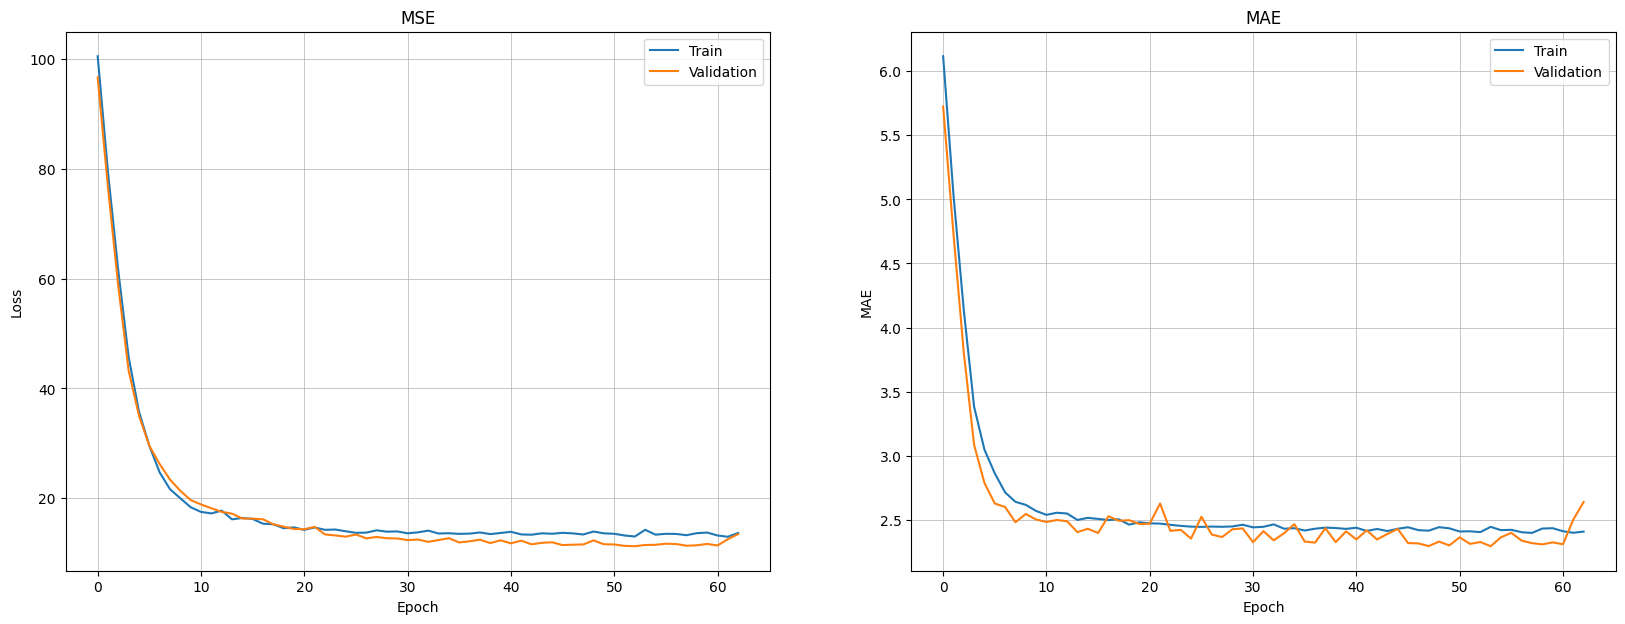

In [221]:
plot_history(history)